In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')

In [7]:
#para o histograma
x1_list = [0]
x2_list = [0]
y1_list = [0]
y2_list = [0]

#com rejeição
x0 = 0
y0 = 0
x = 0
y = 0


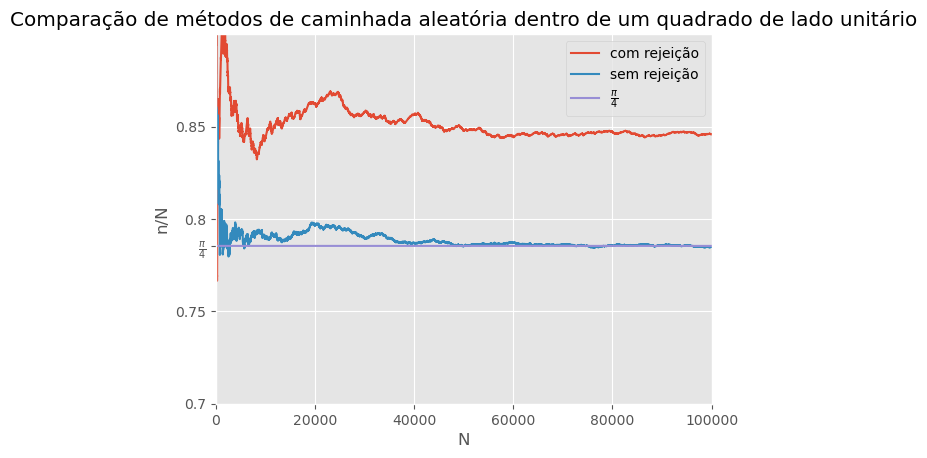

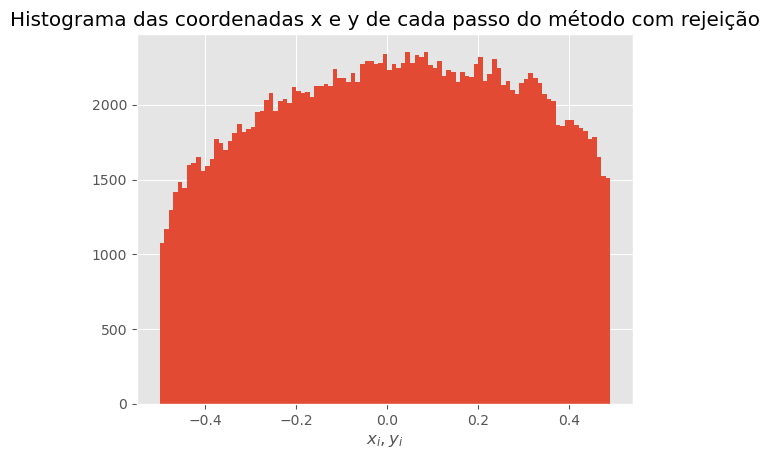

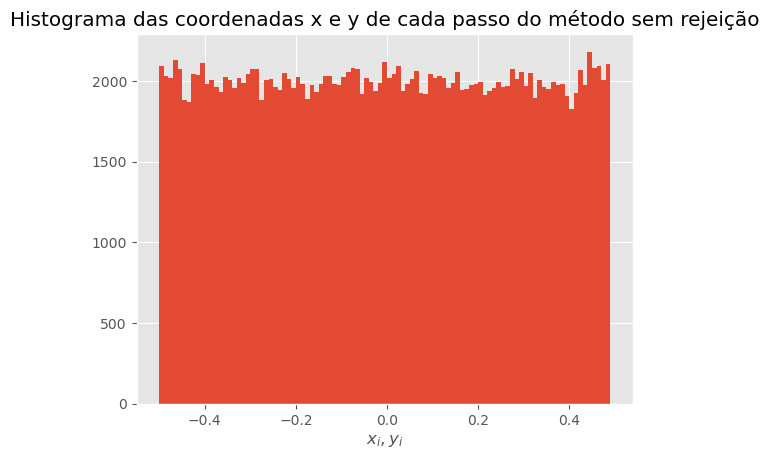

In [8]:
t = 100000
counter_sq = 0
counter_cir = 0
i = 0

ratio_list = []
N_list = []

def random_gen():
  r1 = np.random.uniform(-1,1)
  r2 = np.random.uniform(-1,1)
  return [r1,r2]

while i<t:
  r = random_gen()
  step = 0.3*r[0]
  angle = 0.3*r[1]
  x0 += step*np.cos(angle)
  y0 += step*np.sin(angle)
  if -0.5<=x0<=0.5 and -0.5<=y0<=0.5:
    counter_sq +=1
    x += step*np.cos(angle)
    y += step*np.sin(angle)
    x1_list.append(x)
    y1_list.append(y)
    i+=1
    if (x0)**2+(y0)**2 <= 0.25:
      counter_cir +=1
  else:
    x0 = x
    y0 = y


  ratio_list.append(counter_cir/counter_sq)
  N_list.append(counter_sq)


plt.plot(N_list,ratio_list,label='com rejeição')

#sem rejeição
x = 0
y = 0


counter_sq = 0
counter_cir = 0

ratio_list = []
N_list = []

def random_gen():
  r1 = np.random.uniform(-1,1)
  r2 = np.random.uniform(-1,1)
  return [r1,r2]

for i in range(t):
  r = random_gen()
  x += 0.3*r[0]
  y += 0.3*r[1]
  if -0.5<=x<=0.5 and -0.5<=y<=0.5:
    counter_sq +=1
    x2_list.append(x)
    y2_list.append(y)
    if (x)**2+(y)**2 <= 0.25:
      counter_cir +=1

  else:
    counter_sq += 1
    x -= 0.3*r[0]
    y -= 0.3*r[1]
    x2_list.append(x)
    y2_list.append(y)
    if (x)**2+(y)**2 <= 0.25:
      counter_cir +=1

  ratio_list.append(counter_cir/counter_sq)
  N_list.append(counter_sq)

#plot da comparação dos métodos

pi_list = [0.785398 for i in range(len(N_list))]

plt.plot(N_list,ratio_list,label='sem rejeição')
plt.xlabel('N')
plt.ylabel('n/N')
plt.plot(N_list,pi_list,label=r'$\frac{\pi}{4}$')
y = [0.70,0.75,0.785398,0.80,0.85]
ytick = [0.70,0.75,r'$\frac{\pi}{4}$',0.80,0.85]
plt.yticks(y, ytick)
plt.ylim(0.7,0.9)
plt.xlim(0,100000)
plt.legend()
plt.title('Comparação de métodos de caminhada aleatória dentro de um quadrado de lado unitário')
plt.savefig('grafico_comparativo.png',bbox_inches='tight')
plt.show()
#histogramas
xy1_list = x1_list + y1_list
xy2_list = x2_list + y2_list
bins = np.arange(-0.5,0.5,0.01)
plt.hist(xy1_list,bins)
plt.xlabel('$x_i,y_i$')
plt.title('Histograma das coordenadas x e y de cada passo do método com rejeição')
plt.savefig('histograma_com_rejeicao.png',bbox_inches='tight')
plt.show()
plt.hist(xy2_list,bins)
plt.xlabel('$x_i,y_i$')
plt.title('Histograma das coordenadas x e y de cada passo do método sem rejeição')
plt.savefig('histograma_sem_rejeicao.png',bbox_inches='tight')
plt.show()